In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv("../../data/bikes_rent.csv")

In [3]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


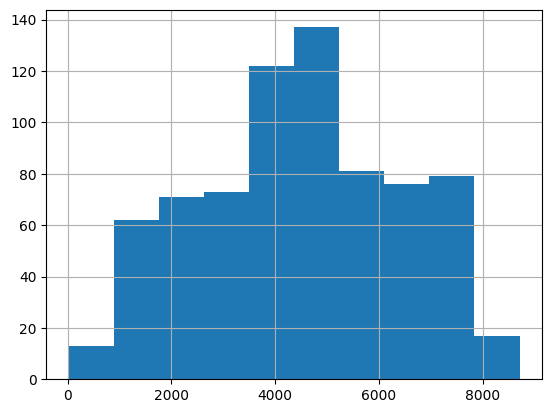

In [4]:
data["cnt"].hist();

In [5]:
X_df, y_series = data.drop("cnt", axis=1), data["cnt"]

In [6]:
X_df.shape

(731, 12)

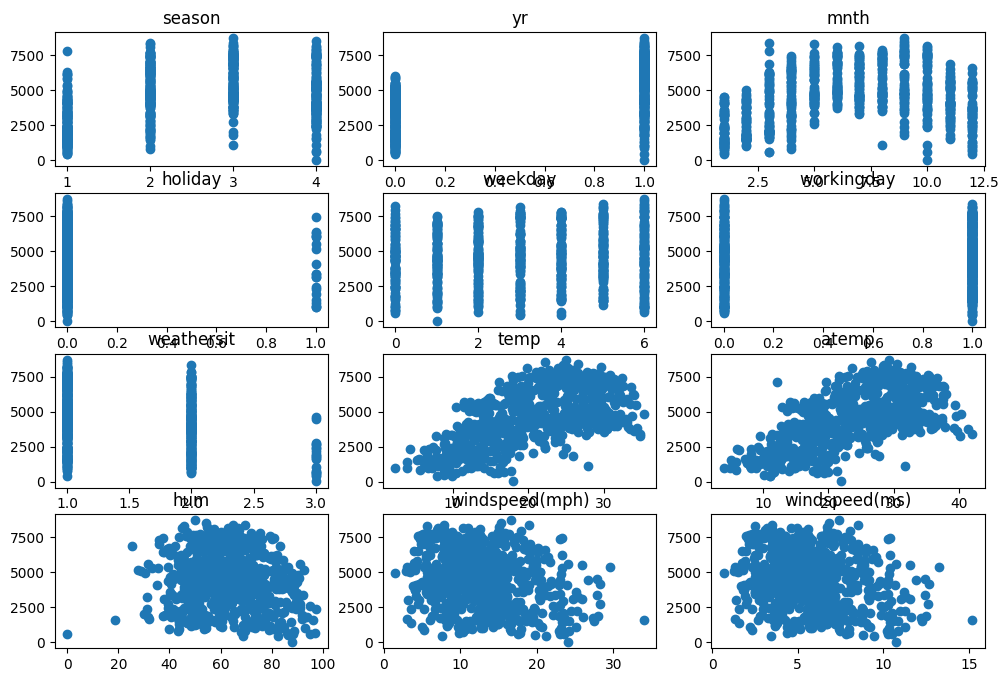

In [7]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(X_df.columns):
    plt.subplot(4, 3, i + 1)
    plt.scatter(X_df[col], y_series)
    plt.title(col);

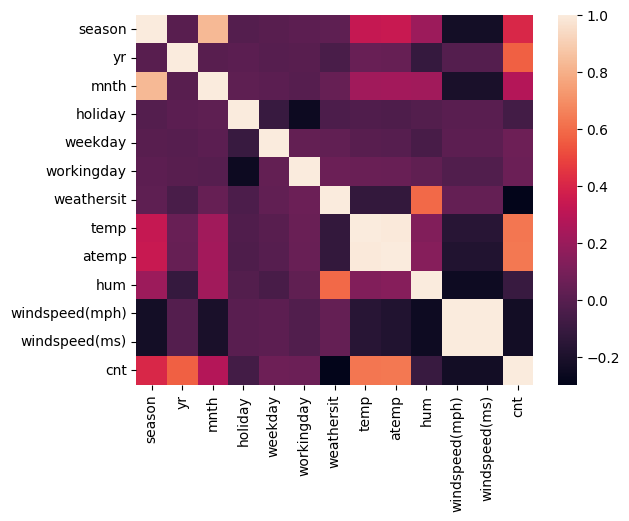

In [8]:
sns.heatmap(data.corr());

In [9]:
from sklearn.linear_model import Lasso, LassoCV, LinearRegression, Ridge, RidgeCV

In [ ]:
ols = LinearRegression(normalize=True)

In [ ]:
train_share = 0.7

train_part_len = int(train_share * data.shape[0])

X_train = X_df.values[:train_part_len, :]
X_valid = X_df.values[train_part_len:, :]
y_train = y_series.values[:train_part_len]
y_valid = y_series.values[train_part_len:]

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
ols.fit(X_train, y_train)

In [ ]:
y_ols_pred = ols.predict(X_valid)

In [ ]:
def rmse(y, p):
    return np.sqrt(mean_squared_error(y, p))

In [ ]:
def beatiful_coef(coefs, feature_names=X_df.columns):
    return pd.DataFrame(coefs, index=feature_names, columns=["coef"]).sort_values(
        "coef", ascending=False
    )

In [ ]:
rmse(y_valid, y_ols_pred)

In [ ]:
beatiful_coef(ols.coef_, feature_names=X_df.columns)

In [ ]:
ridge = Ridge(random_state=17, normalize=True)

In [ ]:
ridge.fit(X_train, y_train)

In [ ]:
beatiful_coef(ridge.coef_)

In [ ]:
ridge_valid_pred = ridge.predict(X_valid)

In [ ]:
rmse(y_valid, ridge_valid_pred)

In [ ]:
alphas = np.logspace(-4, 4, 100)

In [ ]:
ridge_cv = RidgeCV(alphas=alphas, cv=5, normalize=True).fit(X_train, y_train)

In [ ]:
ridge_cv.alpha_

In [ ]:
best_ridge_valid_pred = ridge_cv.predict(X_valid)

In [ ]:
rmse(y_valid, best_ridge_valid_pred)

In [ ]:
lasso = LassoCV(alphas=alphas, cv=5, normalize=True).fit(X_train, y_train)

In [ ]:
lasso.alpha_

In [ ]:
best_lasso_valid_pred = lasso.predict(X_valid)

In [ ]:
rmse(y_valid, best_lasso_valid_pred)

In [ ]:
beatiful_coef(lasso.coef_)

In [ ]:
beatiful_coef(ridge_cv.coef_)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest = RandomForestRegressor(n_estimators=100, random_state=17)

In [ ]:
forest.fit(X_train, y_train)

In [ ]:
forest_valid_pred = forest.predict(X_valid)

In [ ]:
rmse(y_valid, forest_valid_pred)

In [ ]:
beatiful_coef(forest.feature_importances_)